#FUEL CONSUMPTION AND CO2 EMISSION

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

%matplotlib inline
# !pip install mlxtend --upgrade


## DATA SCIENCE

In [2]:
fuel_df = pd.read_csv('FuelConsumptionCo2.csv')
fuel_df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
fuel_df.shape

(1067, 12)

In [4]:
fuel_df.columns

Index(['MODELYEAR', 'Brands', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
fuel_df.dtypes

MODELYEAR                     int64
Brands                       object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [6]:
fuel_df.isna().sum()

MODELYEAR                   0
Brands                      0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
fuel_df.duplicated().sum()

115

In [8]:
#Removing the duplicated rows (Records):
fuel_df.drop_duplicates(inplace=True)
fuel_df.duplicated().sum()

0

In [9]:
#Shape after removing the duplicated rows (Records):
print(fuel_df.shape)

(952, 12)


In [10]:
fuel_df['MODELYEAR'].unique()

#Conclusion All of the cars are from the same year 


array([2014])

In [11]:
#So by dropping the modelyear feature 

fuel_df.drop('MODELYEAR', axis=1, inplace=True)
fuel_df.head()

,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## EDA

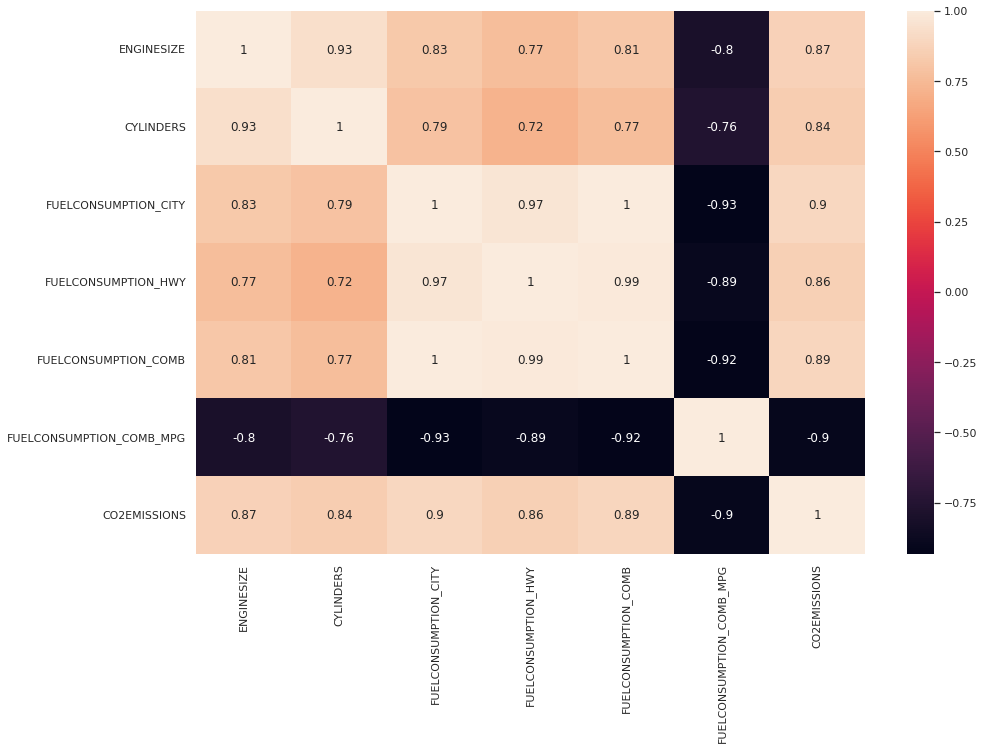

In [12]:
#Heat map to see correlation between features
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(data=fuel_df.corr(),annot=True,) 

[Text(0.5, 1.0, 'MPG')]

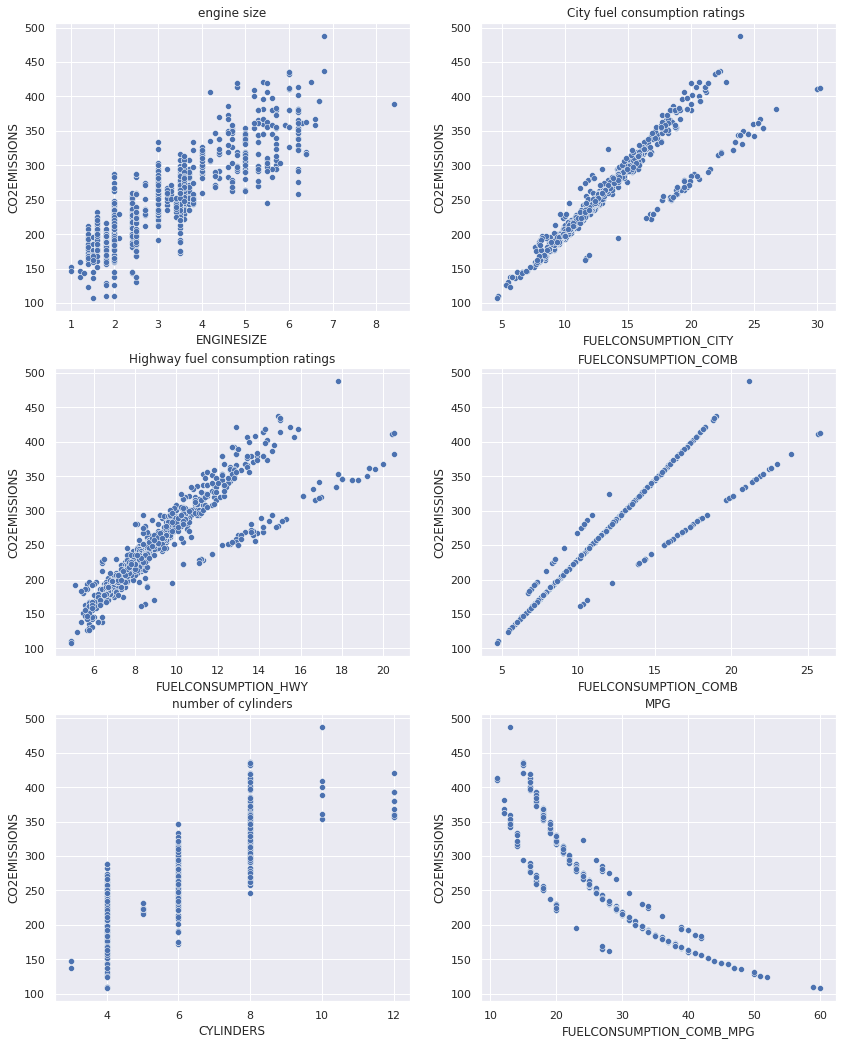

In [13]:
fig,axes=plt.subplots(3,2,figsize=(14,18))

sns.scatterplot(data = fuel_df , x = 'ENGINESIZE' , y = 'CO2EMISSIONS' , ax = axes[0,0]).set(title = 'engine size')
sns.scatterplot(data = fuel_df , x = 'FUELCONSUMPTION_CITY' , y = 'CO2EMISSIONS' , ax = axes[0,1]).set(title = 'City fuel consumption ratings ')
sns.scatterplot(data = fuel_df , x = 'FUELCONSUMPTION_HWY' , y = 'CO2EMISSIONS' , ax = axes[1,0]).set(title = 'Highway fuel consumption ratings')
sns.scatterplot(data = fuel_df , x = 'FUELCONSUMPTION_COMB' , y = 'CO2EMISSIONS' , ax = axes[1,1]).set(title = 'FUELCONSUMPTION_COMB')
sns.scatterplot(data = fuel_df , x = 'CYLINDERS' , y = 'CO2EMISSIONS' , ax = axes[2,0]).set(title = 'number of cylinders')
sns.scatterplot(data = fuel_df , x = 'FUELCONSUMPTION_COMB_MPG' , y = 'CO2EMISSIONS' , ax = axes[2,1]).set(title = 'MPG')



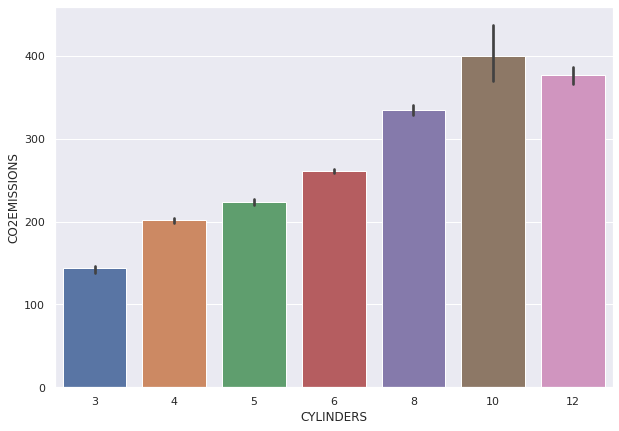

In [14]:
sns.set(rc={'figure.figsize':(10,7)})
sns.barplot(data = fuel_df , x = 'CYLINDERS' , y = 'CO2EMISSIONS')

MID_SIZE                   167
COMPACT                    151
SUV_SMALL                  145
SUV_STANDARD                92
FULL_SIZE                   71
PICKUP TRUCK_STANDARD       62
SUBCOMPACT                  61
TWO-SEATER                  51
STATION_WAGON_SMALL         36
MINICOMPACT                 33
VAN_PASSENGER               25
VAN_CARGO                   20
MINIVAN                     14
PICKUP_TRUCK_SMALL          12
SPECIAL_PURPOSE_VEHICLE      7
STATION_WAGON_MID_SIZE       5
Name: VEHICLECLASS, dtype: int64


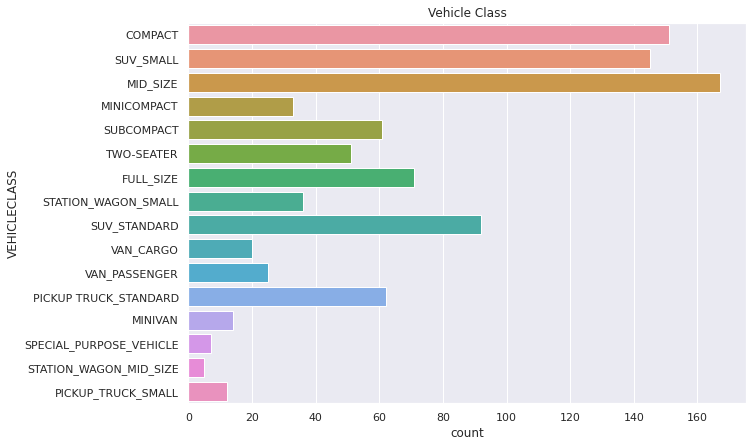

In [15]:
sns.countplot(data = fuel_df , y = 'VEHICLECLASS').set(title = 'Vehicle Class')
print(fuel_df['VEHICLECLASS'].value_counts())

[Text(0.5, 1.0, 'Car Brands')]

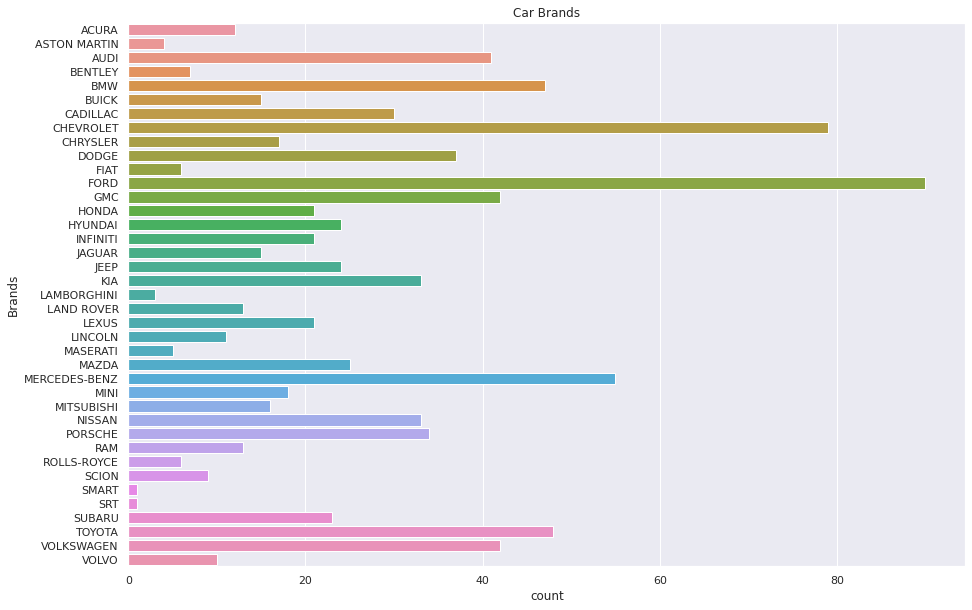

In [16]:
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(data = fuel_df , y = 'Brands').set(title = 'Car Brands')

[Text(0.5, 1.0, 'FUELTYPES')]

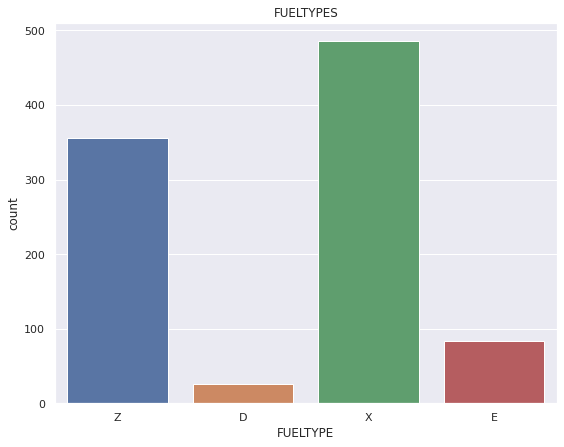

In [17]:
sns.set(rc={'figure.figsize':(9,7)})
sns.countplot(data = fuel_df , x = 'FUELTYPE').set(title = 'FUELTYPES')


[Text(0.5, 1.0, 'Number of cylinders')]

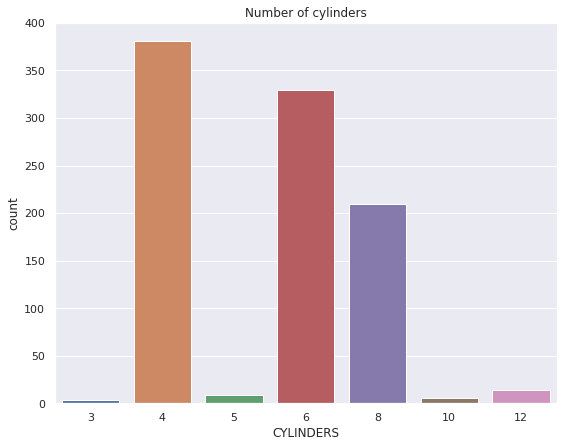

In [18]:
sns.countplot(data = fuel_df , x = 'CYLINDERS').set(title = 'Number of cylinders')

[Text(0.5, 1.0, 'Transmission type')]

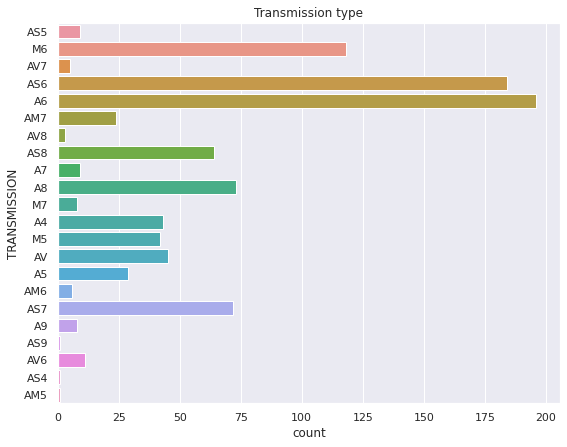

In [19]:
sns.countplot(data = fuel_df , y = 'TRANSMISSION').set(title = 'Transmission type')

In [20]:
#Converting categorical features into numerals to be able to train with them

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
 
FuelType_label  = le.fit_transform(fuel_df['FUELTYPE'])
VEHICLECLASS_label = le.fit_transform(fuel_df['VEHICLECLASS'])
TRANSMISSION_label = le.fit_transform(fuel_df['TRANSMISSION'])
BRANDS_label  = le.fit_transform(fuel_df['Brands'])
 
fuel_df.drop('FUELTYPE', axis=1, inplace=True)
fuel_df.drop('VEHICLECLASS', axis=1, inplace=True)
fuel_df.drop('TRANSMISSION', axis=1, inplace=True)
fuel_df.drop('Brands', axis=1, inplace=True)
 
fuel_df['FUELTYPE'] = FuelType_label 
fuel_df['VEHICLECLASS'] = VEHICLECLASS_label 
fuel_df['TRANSMISSION'] = TRANSMISSION_label 
fuel_df['Brands'] = BRANDS_label 

fuel_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,FUELTYPE,VEHICLECLASS,TRANSMISSION,Brands
0,2.0,4,9.9,6.7,8.5,33,196,3,0,10,0
1,2.4,4,11.2,7.7,9.6,29,221,3,0,20,0
2,1.5,4,6.0,5.8,5.9,48,136,3,0,17,0
3,3.5,6,12.7,9.1,11.1,25,255,3,11,11,0
4,3.5,6,12.1,8.7,10.6,27,244,3,11,11,0


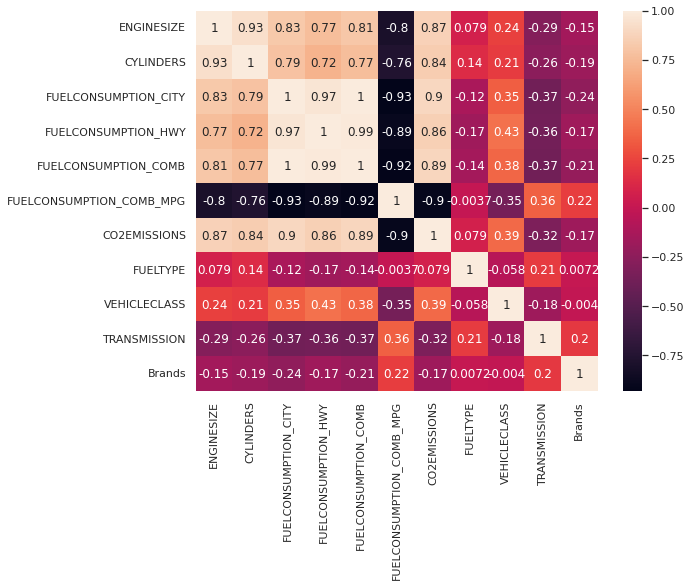

In [21]:
#Correlation after converting the categorical features
sns.heatmap(data=fuel_df.corr(),annot=True) 

## Conclusions: 

* 'FUELCONSUMPTION_CITY' is the highest "Positive"    correlated to the 'CO2EMISSION' .
* While 'FUELCONSUMPTION_COMB' is the highest "negative" correlated to the 'CO2EMISSION' .
* Cars with more number of cylinders emit more co2 (with 10 cylinders emit the most) .
* Most common vehicle classes are mid_class then compact then SUV .
* Most common Brand is FORD then CHEVORLET.
* Most common fuel type is 'X = regular gasoline' , while the least common is 'D = diesel' .
* Most cars have (4,6 or 8) cylinders .
* Most common transmission type is 'A6 = Automatic with 6 gears' , then 'As6 = Automatic with select shift with 6 gears'













## MACHINE LEARNING

In [22]:
x = fuel_df[['FUELCONSUMPTION_CITY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','FUELTYPE','VEHICLECLASS','CYLINDERS','FUELCONSUMPTION_HWY','ENGINESIZE','TRANSMISSION']].values
y = fuel_df['CO2EMISSIONS'].values

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

poly_reg = PolynomialFeatures(degree=3)

x_poly = poly_reg.fit_transform(x)

x_train, x_test, y_train, y_test  = train_test_split(x_poly,y, test_size=0.33, random_state = 1)

In [24]:
LR_model= linear_model.LinearRegression()

LR_model.fit(x_train,y_train)

y_pred = LR_model.predict(x_test)

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


MSE = mean_squared_error(y_test,y_pred)
print('mean_squared_error',MSE)

RMSE = np.sqrt(MSE)
print('Root_mean_squared_error',RMSE)

r_score = r2_score(y_test,y_pred)
print('r_score',r_score)

MAE= mean_absolute_error(y_test,y_pred)

print('mean_absolute_error',MAE)

mean_squared_error 7.090768008811166
Root_mean_squared_error 2.662849603115273
r_score 0.9982034424164108
mean_absolute_error 0.859556695021036


In [26]:

from mlxtend.evaluate import bias_variance_decomp

avg_loss, avg_bais, avg_variance = bias_variance_decomp(LR_model,x_train,y_train,x_test,y_test, loss = 'mse', random_seed=32, num_rounds=200)

print('Average Loss = ', avg_loss)
print('Average bais = ', avg_bais)
print('Average variance = ', avg_variance)

Average Loss =  11.943275319726078
Average bais =  6.057868443729874
Average variance =  5.885406875996216
